In [92]:
from halotools.mock_observables import tpcf
import numpy as np
import matplotlib.pyplot as plt
rbins = np.logspace(-1, 1.8, 20)
rbin_centers = (rbins[1:] + rbins[:-1])/2.

In [93]:
def web_classification(n_data, n_random):
    assert len(n_data) == len(n_random)
    n_points = len(n_data)
    r_values = (n_data-n_random)/(n_data+n_random)
    web_class = np.zeros(n_points, dtype=int)
    lower_limit = -0.90
    upper_limit = 0.90
    is_void = r_values <= lower_limit
    is_sheet = (r_values > lower_limit) & (r_values<=0.0)
    is_filament = (r_values>0.0) & (r_values <= upper_limit)
    is_peak = (r_values > upper_limit)
    web_class[is_void] = 0
    web_class[is_sheet] = 1
    web_class[is_filament] = 2
    web_class[is_peak] = 3
    return web_class  

In [94]:
pos_data = np.loadtxt("../data/TNG/TNG300-1/pos/subhalo_massive_xyz.dat")
pos_rand = np.loadtxt("../data/TNG/TNG300-1/pos/random_000_subhalo_massive_xyz.dat")
pos_data = pos_data[:,0:3]/1000
pos_rand = pos_rand[:,0:3]/1000
n_con_random = np.loadtxt("../data/TNG/TNG300-1/web/random_000_subhalo_massive_xyz_subhalo_massive_xyz_nconnections.dat")
n_con_data = np.loadtxt("../data/TNG/TNG300-1/web/subhalo_massive_xyz_random_000_subhalo_massive_xyz_nconnections.dat")
web_data = web_classification(n_con_data[:,0], n_con_data[:,1])
web_random = web_classification(n_con_random[:,0], n_con_random[:,1])

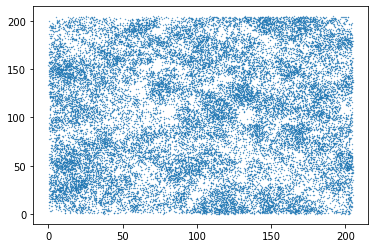

In [95]:
is_void = web_random==0
plt.scatter(pos_rand[is_void,0], pos_rand[is_void,1], s=0.1)

In [ ]:
is_void = web_random==0
rand_void = pos_rand[is_void]
xi_rand_void_data = tpcf(rand_void, rbins, pos_data, period = 205.0)

is_sheet = web_random==1
rand_sheet = pos_rand[is_sheet]
xi_rand_sheet_data = tpcf(rand_sheet, rbins, pos_data, period = 205.0)

In [ ]:
plt.plot(rbin_centers,xi_rand_void_data[1])
plt.plot(rbin_centers,xi_rand_sheet_data[1])

In [ ]:
xi_rand_void_rand_sheet = tpcf(rand_void, rbins, rand_sheet, period = 205.0)

In [ ]:
plt.plot(rbin_centers,xi_rand_void_rand_sheet[1])
plt.semilogx()

In [ ]:
is_filament = web_random==2
rand_filament = pos_rand[is_filament]

In [ ]:
xi_rand_sheet_rand_filament = tpcf(rand_sheet, rbins, rand_filament, period = 205.0)

In [ ]:
xi_rand_void_rand_filament = tpcf(rand_void, rbins, rand_filament, period = 205.0)

In [ ]:
plt.plot(rbin_centers,xi_rand_void_rand_sheet[0]) # void
plt.plot(rbin_centers,xi_rand_sheet_rand_filament[0]) # sheet
plt.plot(rbin_centers,xi_rand_sheet_rand_filament[2]) # filament

plt.semilogx()
#plt.semilogy()

In [ ]:
plt.plot(rbin_centers,xi_rand_void_rand_sheet[1]) # void-sheet
plt.plot(rbin_centers,xi_rand_sheet_rand_filament[1]) # sheet-filament
plt.plot(rbin_centers,xi_rand_void_rand_filament[1]) # void-filament

plt.semilogx()

In [ ]:
is_sheet = web_data==1
data_sheet = pos_data[is_sheet]
is_filament = web_data==2
data_filament = pos_data[is_filament]

In [ ]:
xi_data_sheet_rand_filament = tpcf(data_sheet, rbins, rand_filament, period = 205.0)

In [ ]:
xi_data_sheet_rand_void = tpcf(data_sheet, rbins, rand_void, period = 205.0)

In [ ]:
xi_data_sheet_rand_sheet = tpcf(data_sheet, rbins, rand_sheet, period = 205.0)

In [ ]:
plt.plot(rbin_centers,xi_data_sheet_rand_filament[1]) # sheet-filament
plt.plot(rbin_centers,xi_data_sheet_rand_void[1]) # sheet-void
plt.plot(rbin_centers,xi_data_sheet_rand_sheet[1]) # sheet-sheet

plt.semilogx()